In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
heart = pd.read_csv('heart.csv')

In [6]:
heart.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


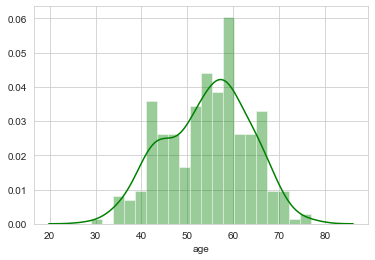

In [7]:
sns.set_style(style='whitegrid')
sns.distplot(heart['age'], color = 'green', bins = 20)

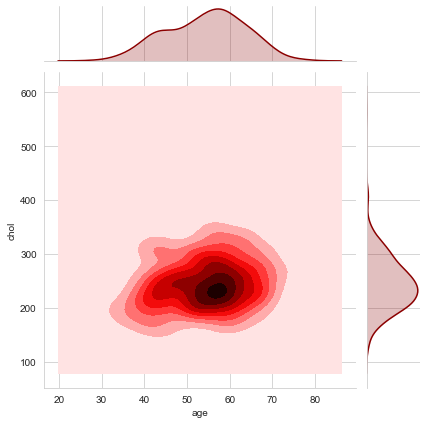

In [8]:
sns.jointplot('age', 'chol', data = heart, kind = 'kde', color = 'darkred')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


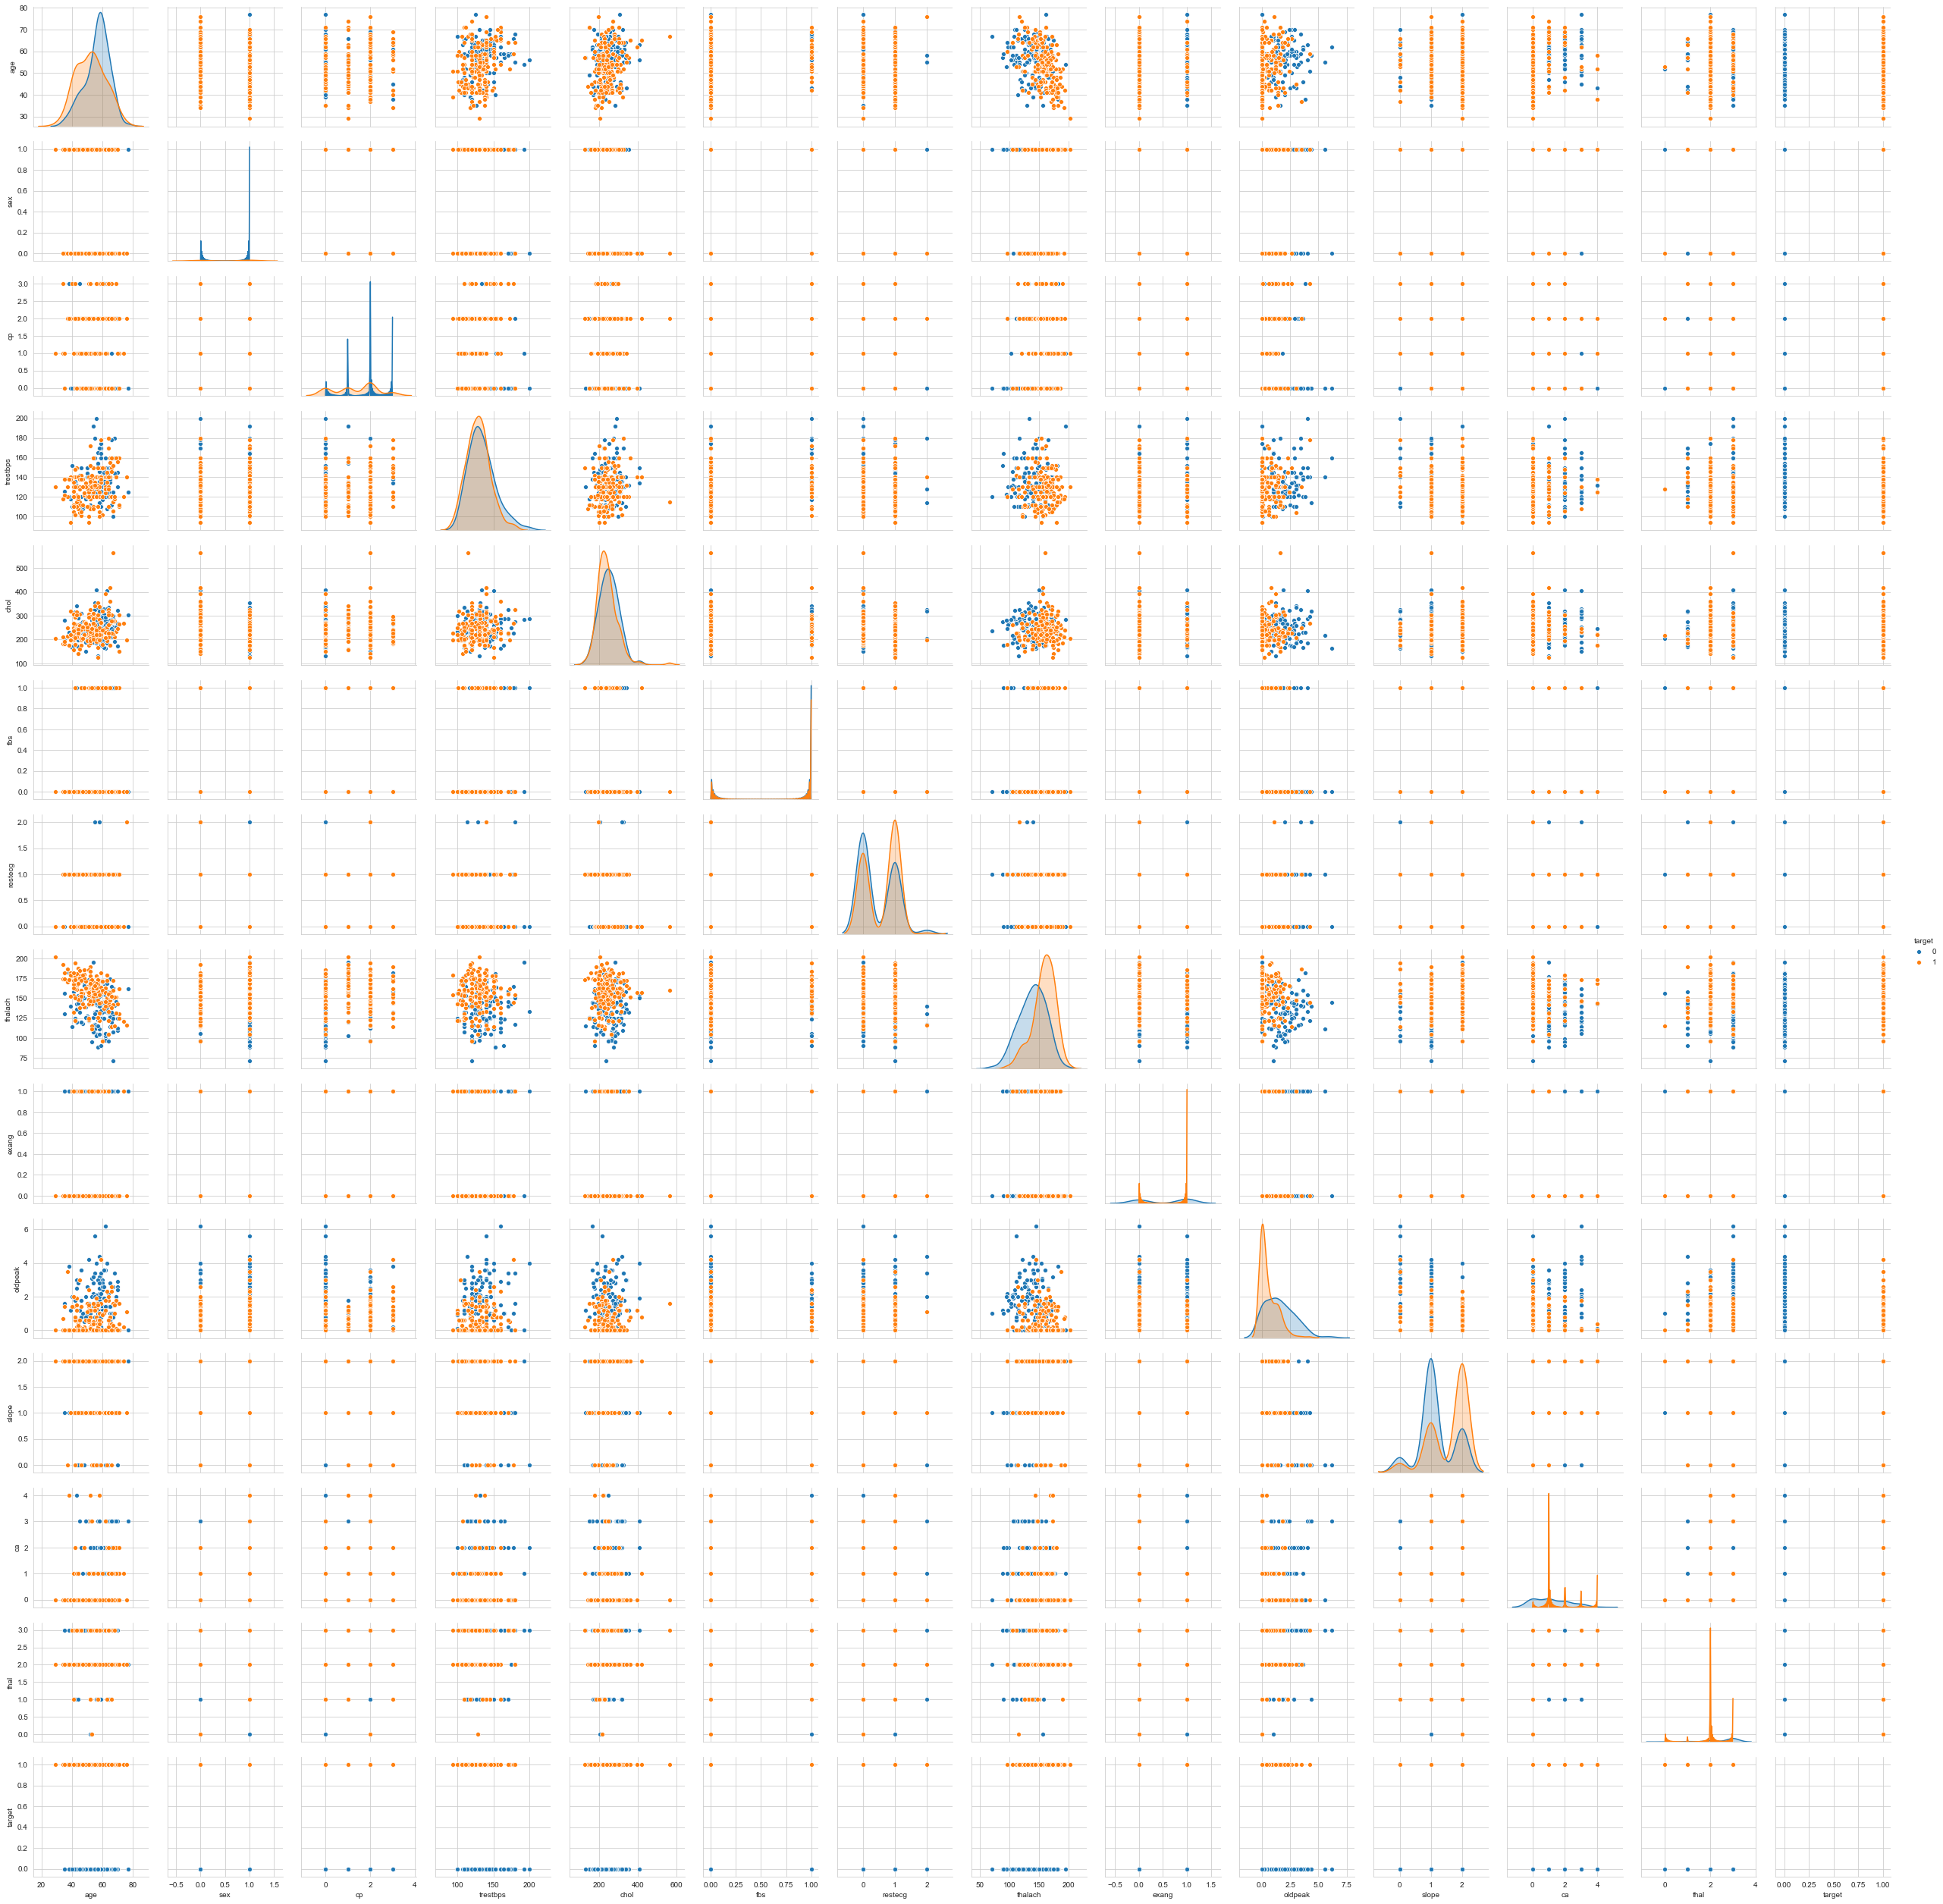

In [9]:
sns.pairplot(heart, hue = 'target')

In [10]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled.fit(heart.drop('target', axis = 1))
scaled = scaled.transform(heart.drop('target', axis = 1))

In [13]:
import statsmodels.api as sm
X = scaled[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.236
Model:                            OLS   Adj. R-squared (uncentered):              0.201
Method:                 Least Squares   F-statistic:                              6.880
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    1.43e-11
Time:                        22:05:37   Log-Likelihood:                         -297.13
No. Observations:                 303   AIC:                                      620.3
Df Residuals:                     290   BIC:                                      668.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0074      0.046     -0.163      0.870      -0.097       0.082
x2            -0.0912      0.041     -2.233      0.026      -0.172      -0.011
x3             0.1161      0.043      2.705      0.007       0.032       0.201
x4            -0.0349      0.041     -0.851      0.396      -0.116       0.046
x5            -0.0183      0.041     -0.450      0.653      -0.098       0.062
x6             0.0062      0.040      0.156      0.876      -0.072       0.084
x7             0.0262      0.039      0.671      0.503      -0.051       0.103
x8             0.0690      0.048      1.435      0.152      -0.026       0.164
x9            -0.0676      0.045     -1.506      0.133      -0.156       0.021
x10           -0.0681      0.049     -1.377      0.169      -0.166       0.029
x11            0.0486      0.049      1.001      0.318      -0.047       0.144
x12           -0.1027      0.042     -2.472      0.014      -0.184      -0.021
x13           -0.0728      0.041     -1.793      0.074      -0.153       0.007
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import statsmodels.api as sm
X = scaled[:, [0,1,2,3,4,6,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.236
Model:                            OLS   Adj. R-squared (uncentered):              0.204
Method:                 Least Squares   F-statistic:                              7.476
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    5.12e-12
Time:                        22:05:54   Log-Likelihood:                         -297.15
No. Observations:                 303   AIC:                                      618.3
Df Residuals:                     291   BIC:                                      662.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0070      0.045     -0.154      0.878      -0.096       0.082
x2            -0.0908      0.041     -2.232      0.026      -0.171      -0.011
x3             0.1169      0.043      2.744      0.006       0.033       0.201
x4            -0.0340      0.041     -0.838      0.403      -0.114       0.046
x5            -0.0184      0.041     -0.453      0.651      -0.098       0.061
x6             0.0259      0.039      0.665      0.507      -0.051       0.102
x7             0.0693      0.048      1.444      0.150      -0.025       0.164
x8            -0.0672      0.045     -1.502      0.134      -0.155       0.021
x9            -0.0688      0.049     -1.397      0.163      -0.166       0.028
x10            0.0480      0.048      0.993      0.321      -0.047       0.143
x11           -0.1018      0.041     -2.478      0.014      -0.183      -0.021
x12           -0.0731      0.040     -1.808      0.072      -0.153       0.006
==============================================================================
Omnibus:                        6.917   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.134
Skew:                          -0.365   Prob(JB):                       0.0282
Kurtosis:                       2.820   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.api as sm
X = scaled[:, [1,2,3,4,6,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.236
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              8.181
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    1.75e-12
Time:                        22:06:18   Log-Likelihood:                         -297.16
No. Observations:                 303   AIC:                                      616.3
Df Residuals:                     292   BIC:                                      657.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0902      0.040     -2.231      0.026      -0.170      -0.011
x2             0.1165      0.042      2.744      0.006       0.033       0.200
x3            -0.0354      0.039     -0.902      0.368      -0.113       0.042
x4            -0.0194      0.040     -0.487      0.627      -0.098       0.059
x5             0.0262      0.039      0.677      0.499      -0.050       0.103
x6             0.0720      0.045      1.617      0.107      -0.016       0.160
x7            -0.0667      0.045     -1.498      0.135      -0.154       0.021
x8            -0.0690      0.049     -1.404      0.161      -0.166       0.028
x9             0.0479      0.048      0.993      0.322      -0.047       0.143
x10           -0.1031      0.040     -2.563      0.011      -0.182      -0.024
x11           -0.0732      0.040     -1.813      0.071      -0.153       0.006
==============================================================================
Omnibus:                        7.163   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.400
Skew:                          -0.373   Prob(JB):                       0.0247
Kurtosis:                       2.826   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import statsmodels.api as sm
X = scaled[:, [1,2,3,6,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.209
Method:                 Least Squares   F-statistic:                              8.999
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    6.23e-13
Time:                        22:06:36   Log-Likelihood:                         -297.28
No. Observations:                 303   AIC:                                      614.6
Df Residuals:                     293   BIC:                                      651.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0855      0.039     -2.181      0.030      -0.163      -0.008
x2             0.1174      0.042      2.773      0.006       0.034       0.201
x3            -0.0370      0.039     -0.945      0.345      -0.114       0.040
x4             0.0291      0.038      0.762      0.447      -0.046       0.104
x5             0.0713      0.044      1.603      0.110      -0.016       0.159
x6            -0.0677      0.044     -1.525      0.128      -0.155       0.020
x7            -0.0698      0.049     -1.423      0.156      -0.166       0.027
x8             0.0468      0.048      0.972      0.332      -0.048       0.142
x9            -0.1041      0.040     -2.595      0.010      -0.183      -0.025
x10           -0.0755      0.040     -1.885      0.060      -0.154       0.003
==============================================================================
Omnibus:                        7.375   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.623
Skew:                          -0.383   Prob(JB):                       0.0221
Kurtosis:                       2.867   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.api as sm
X = scaled[:, [1,2,3,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              9.949
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    2.47e-13
Time:                        22:07:07   Log-Likelihood:                         -297.58
No. Observations:                 303   AIC:                                      613.2
Df Residuals:                     294   BIC:                                      646.6
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0872      0.039     -2.230      0.027      -0.164      -0.010
x2             0.1182      0.042      2.793      0.006       0.035       0.201
x3            -0.0402      0.039     -1.033      0.302      -0.117       0.036
x4             0.0708      0.044      1.593      0.112      -0.017       0.158
x5            -0.0688      0.044     -1.551      0.122      -0.156       0.018
x6            -0.0687      0.049     -1.403      0.162      -0.165       0.028
x7             0.0494      0.048      1.031      0.304      -0.045       0.144
x8            -0.1056      0.040     -2.639      0.009      -0.184      -0.027
x9            -0.0747      0.040     -1.867      0.063      -0.153       0.004
==============================================================================
Omnibus:                        6.829   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.006
Skew:                          -0.369   Prob(JB):                       0.0301
Kurtosis:                       2.906   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import statsmodels.api as sm
X = scaled[:, [1,2,3,7,8,9,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.231
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              11.06
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    1.16e-13
Time:                        22:07:45   Log-Likelihood:                         -298.13
No. Observations:                 303   AIC:                                      612.3
Df Residuals:                     295   BIC:                                      642.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0862      0.039     -2.204      0.028      -0.163      -0.009
x2             0.1171      0.042      2.768      0.006       0.034       0.200
x3            -0.0409      0.039     -1.053      0.293      -0.117       0.036
x4             0.0815      0.043      1.885      0.060      -0.004       0.167
x5            -0.0713      0.044     -1.611      0.108      -0.158       0.016
x6            -0.0940      0.042     -2.217      0.027      -0.177      -0.011
x7            -0.1018      0.040     -2.553      0.011      -0.180      -0.023
x8            -0.0739      0.040     -1.848      0.066      -0.153       0.005
==============================================================================
Omnibus:                        7.546   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.811
Skew:                          -0.387   Prob(JB):                       0.0201
Kurtosis:                       2.859   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import statsmodels.api as sm
X = scaled[:, [1,2,7,8,9,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.228
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              12.47
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    5.25e-14
Time:                        22:08:07   Log-Likelihood:                         -298.70
No. Observations:                 303   AIC:                                      611.4
Df Residuals:                     296   BIC:                                      637.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0823      0.039     -2.114      0.035      -0.159      -0.006
x2             0.1126      0.042      2.675      0.008       0.030       0.195
x3             0.0805      0.043      1.862      0.064      -0.005       0.166
x4            -0.0739      0.044     -1.672      0.096      -0.161       0.013
x5            -0.1015      0.042     -2.427      0.016      -0.184      -0.019
x6            -0.1052      0.040     -2.648      0.009      -0.183      -0.027
x7            -0.0755      0.040     -1.888      0.060      -0.154       0.003
==============================================================================
Omnibus:                        7.758   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.998
Skew:                          -0.396   Prob(JB):                       0.0183
Kurtosis:                       2.918   Cond. No.                         2.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.api as sm
X = scaled[:, [1,2,7,9,11,12]]
regressor_OLS = sm.OLS(exog = X, endog = heart['target']).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.205
Method:                 Least Squares   F-statistic:                              14.00
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    4.93e-14
Time:                        22:08:44   Log-Likelihood:                         -300.12
No. Observations:                 303   AIC:                                      612.2
Df Residuals:                     297   BIC:                                      634.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0888      0.039     -2.286      0.023      -0.165      -0.012
x2             0.1341      0.040      3.334      0.001       0.055       0.213
x3             0.0982      0.042      2.337      0.020       0.016       0.181
x4            -0.1121      0.041     -2.705      0.007      -0.194      -0.031
x5            -0.1019      0.040     -2.560      0.011      -0.180      -0.024
x6            -0.0825      0.040     -2.068      0.040      -0.161      -0.004
==============================================================================
Omnibus:                        6.488   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.677
Skew:                          -0.352   Prob(JB):                       0.0355
Kurtosis:                       2.819   Cond. No.                         1.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y = heart['target']

In [23]:
from sklearn.model_selection import train_test_split

In [52]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
logreg = KNeighborsClassifier()
logreg.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
pred = logreg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[16  4]
 [ 3 23]]


              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.85      0.88      0.87        26

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46



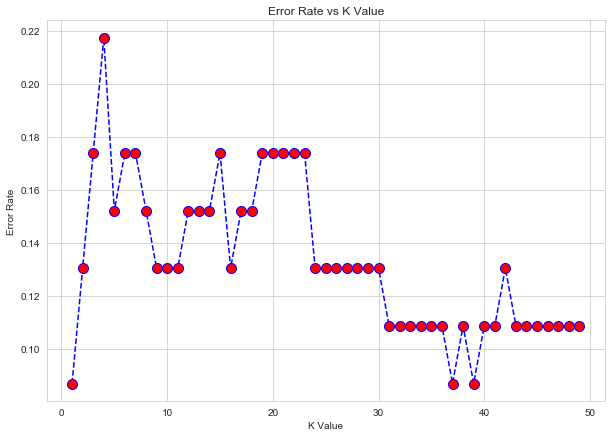

In [56]:

error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,7))
plt.plot(range(1,50), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [60]:
logreg = KNeighborsClassifier(n_neighbors= 37)
logreg.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [61]:
pred = logreg.predict(X_test)

In [62]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[17  3]
 [ 1 25]]


              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.89      0.96      0.93        26

    accuracy                           0.91        46
   macro avg       0.92      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46

